In [408]:
from IPython.display import display, HTML
display(HTML("<style>.jp-Notebook {width: 70% !important; margin: auto !important;}</style>"))

# Table of Contents:
* [EDA](#eda)
* [Training](#training)
* * [Neural Network](#nn)
* * [Logistic Regression](#logres)
* * [Random Forest](#rf)
* [Further Questions](#questions)
* * [Which features are the most important?](#important)

<br>
<br>

# Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [410]:
df = pd.read_csv('data.csv')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<div class="alert alert-info">
    All the relevant features are floats and there is an unnecessary feature called "Unnamed: 32" that seems to appear due to this issue with read_csv(): <a href="https://www.kaggle.com/discussions/general/354943">https://www.kaggle.com/discussions/general/354943</a>
</div>

In [412]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<div class="alert alert-info">
    We drop the "id" and "Unnamed: 32" columns since thery are irrelevant.
</div>

In [413]:
def diagnosis_value(diagnosis):
    return 1 if diagnosis == 'M' else 0

<div class="alert alert-info">
    Encode the target feature numerically.
</div>

In [414]:
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<div class="alert alert-info">
    Applied the numerical encoding of the target variable to the dataset.
</div>

In [415]:
df.isnull().values.any()

np.False_

<div class="alert alert-info">
    There are no null values.
</div>

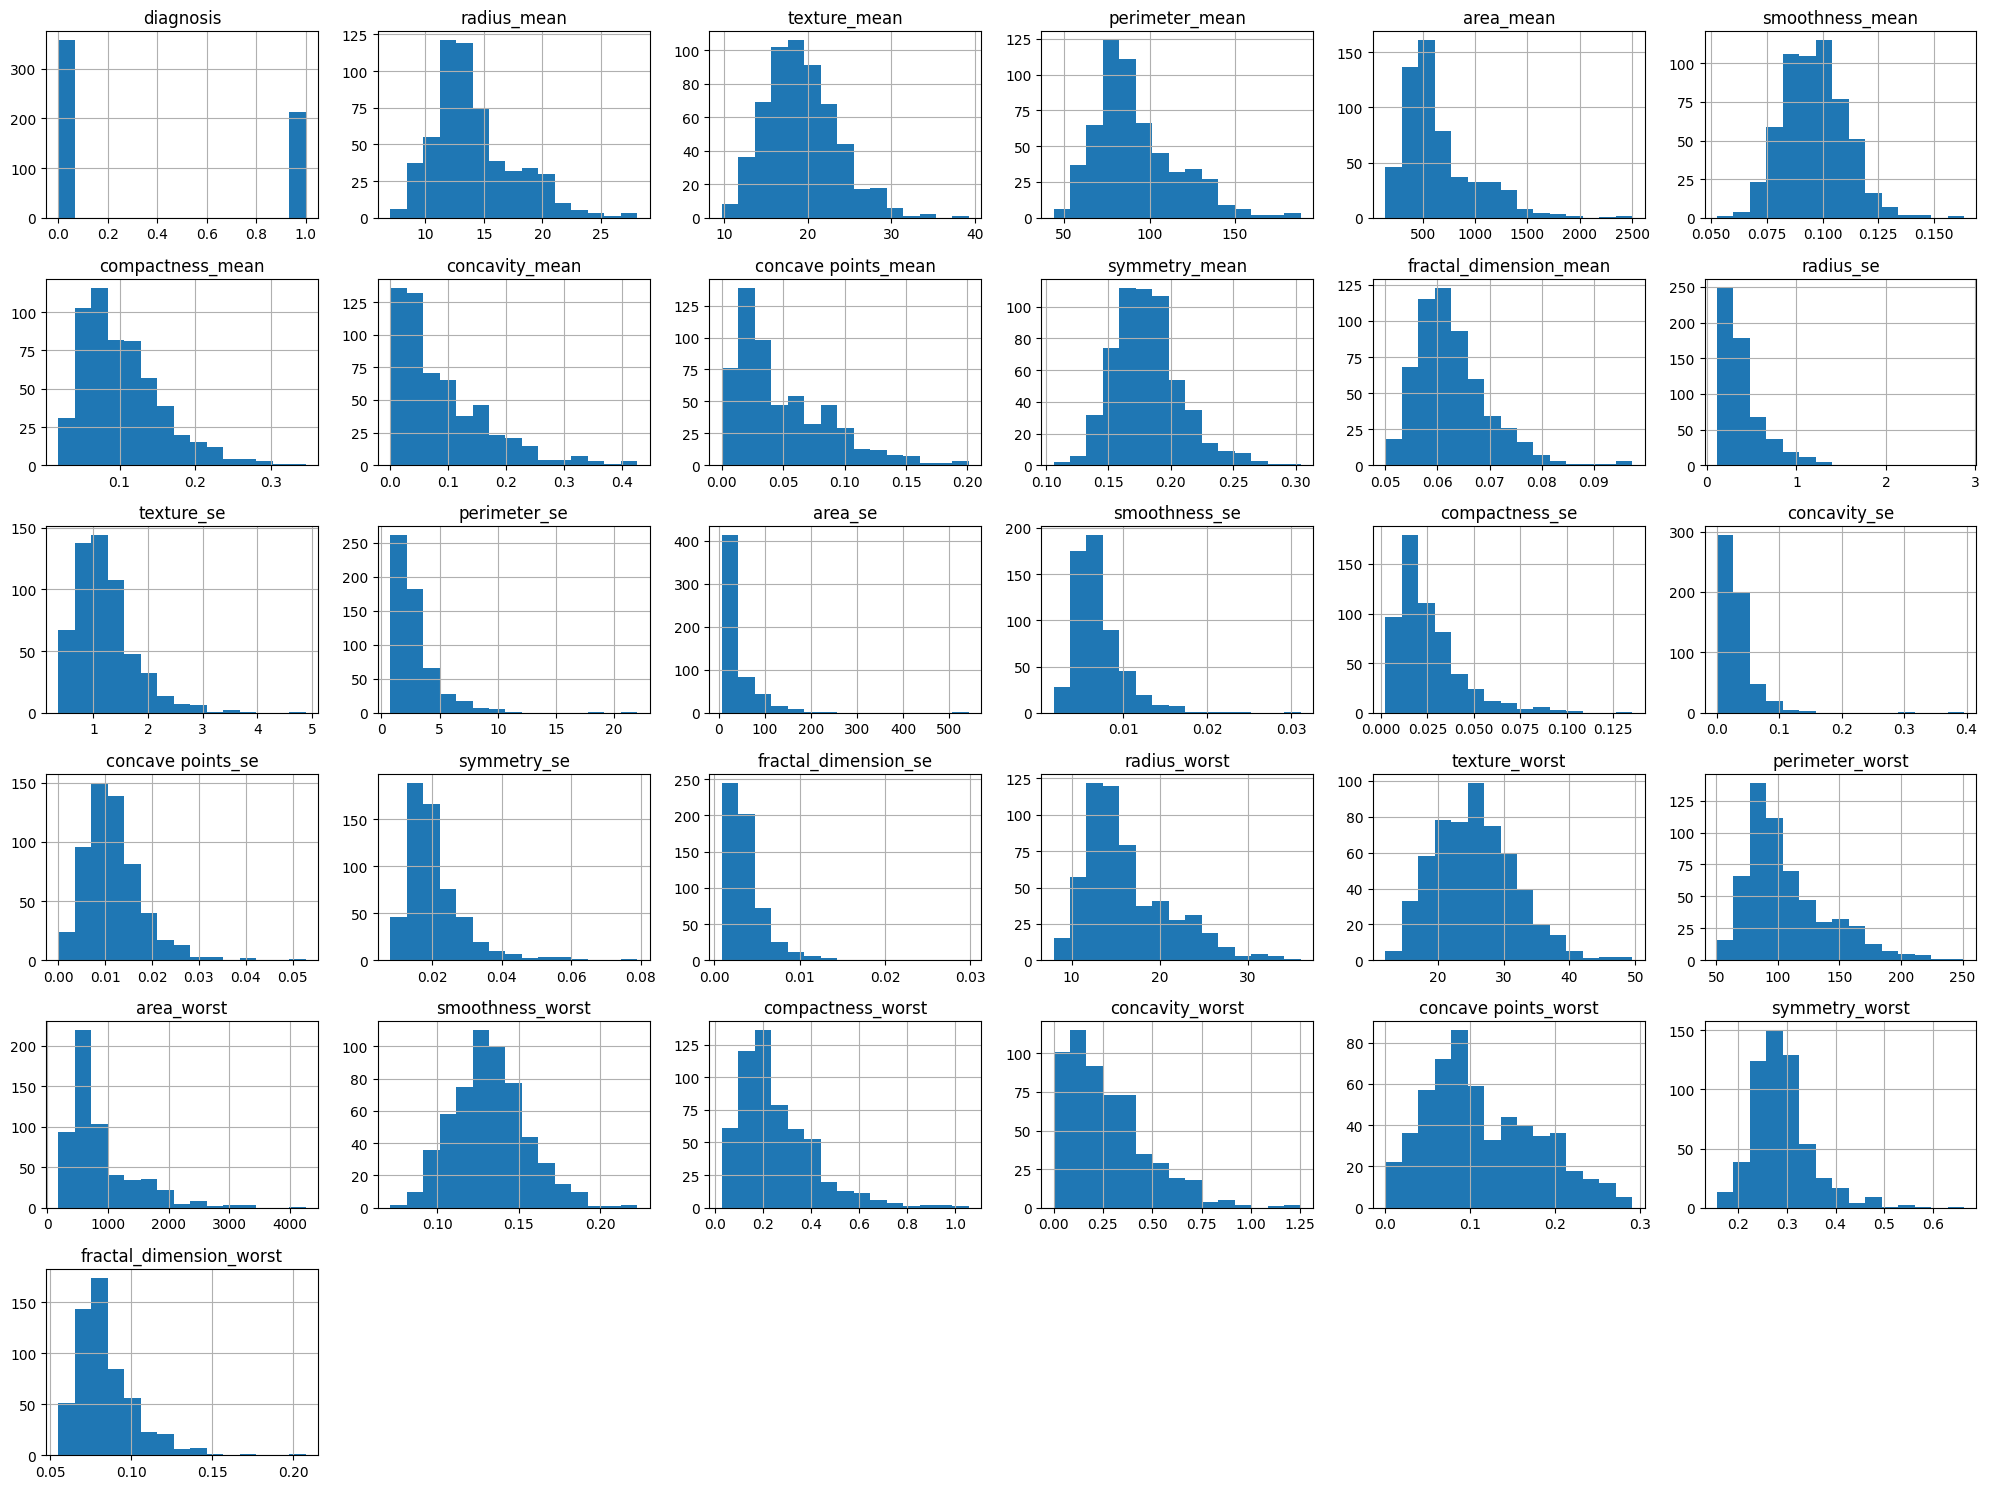

In [416]:
# Plot histograms for each feature
df.hist(bins=15, figsize=(20, 15), layout=(6, 6))
plt.tight_layout()
plt.show()

<div class="alert alert-info">
    The dataset is slightly imbalanced.
    Most features seem to follow a normal distribution (perhaps with a positive skewness).
    For the rest it's feasible to apply a log-transform.
</div>

In [417]:
skewness_arr = df.skew().sort_values(ascending=False)
skewness_arr = skewness_arr[skewness_arr > 2]
print(skewness_arr)

skewness_arr = skewness_arr.index.tolist()

# Add 1 to every skewed data since log(0) is undefined and log(epsilon) is large
df[skewness_arr] = df[skewness_arr].apply(lambda x: np.log(x + 1))
df[df.columns.difference(['diagnosis'])] = preprocessing.StandardScaler().fit_transform(df[df.columns.difference(['diagnosis'])])

area_se                 5.447186
concavity_se            5.110463
fractal_dimension_se    3.923969
perimeter_se            3.443615
radius_se               3.088612
smoothness_se           2.314450
symmetry_se             2.195133
dtype: float64


<div class="alert alert-info">
    Select features with a large positive skewness to apply log-transform.<br>
    After that, standardize every feature (except diagnosis) with StandardScaler().
</div>

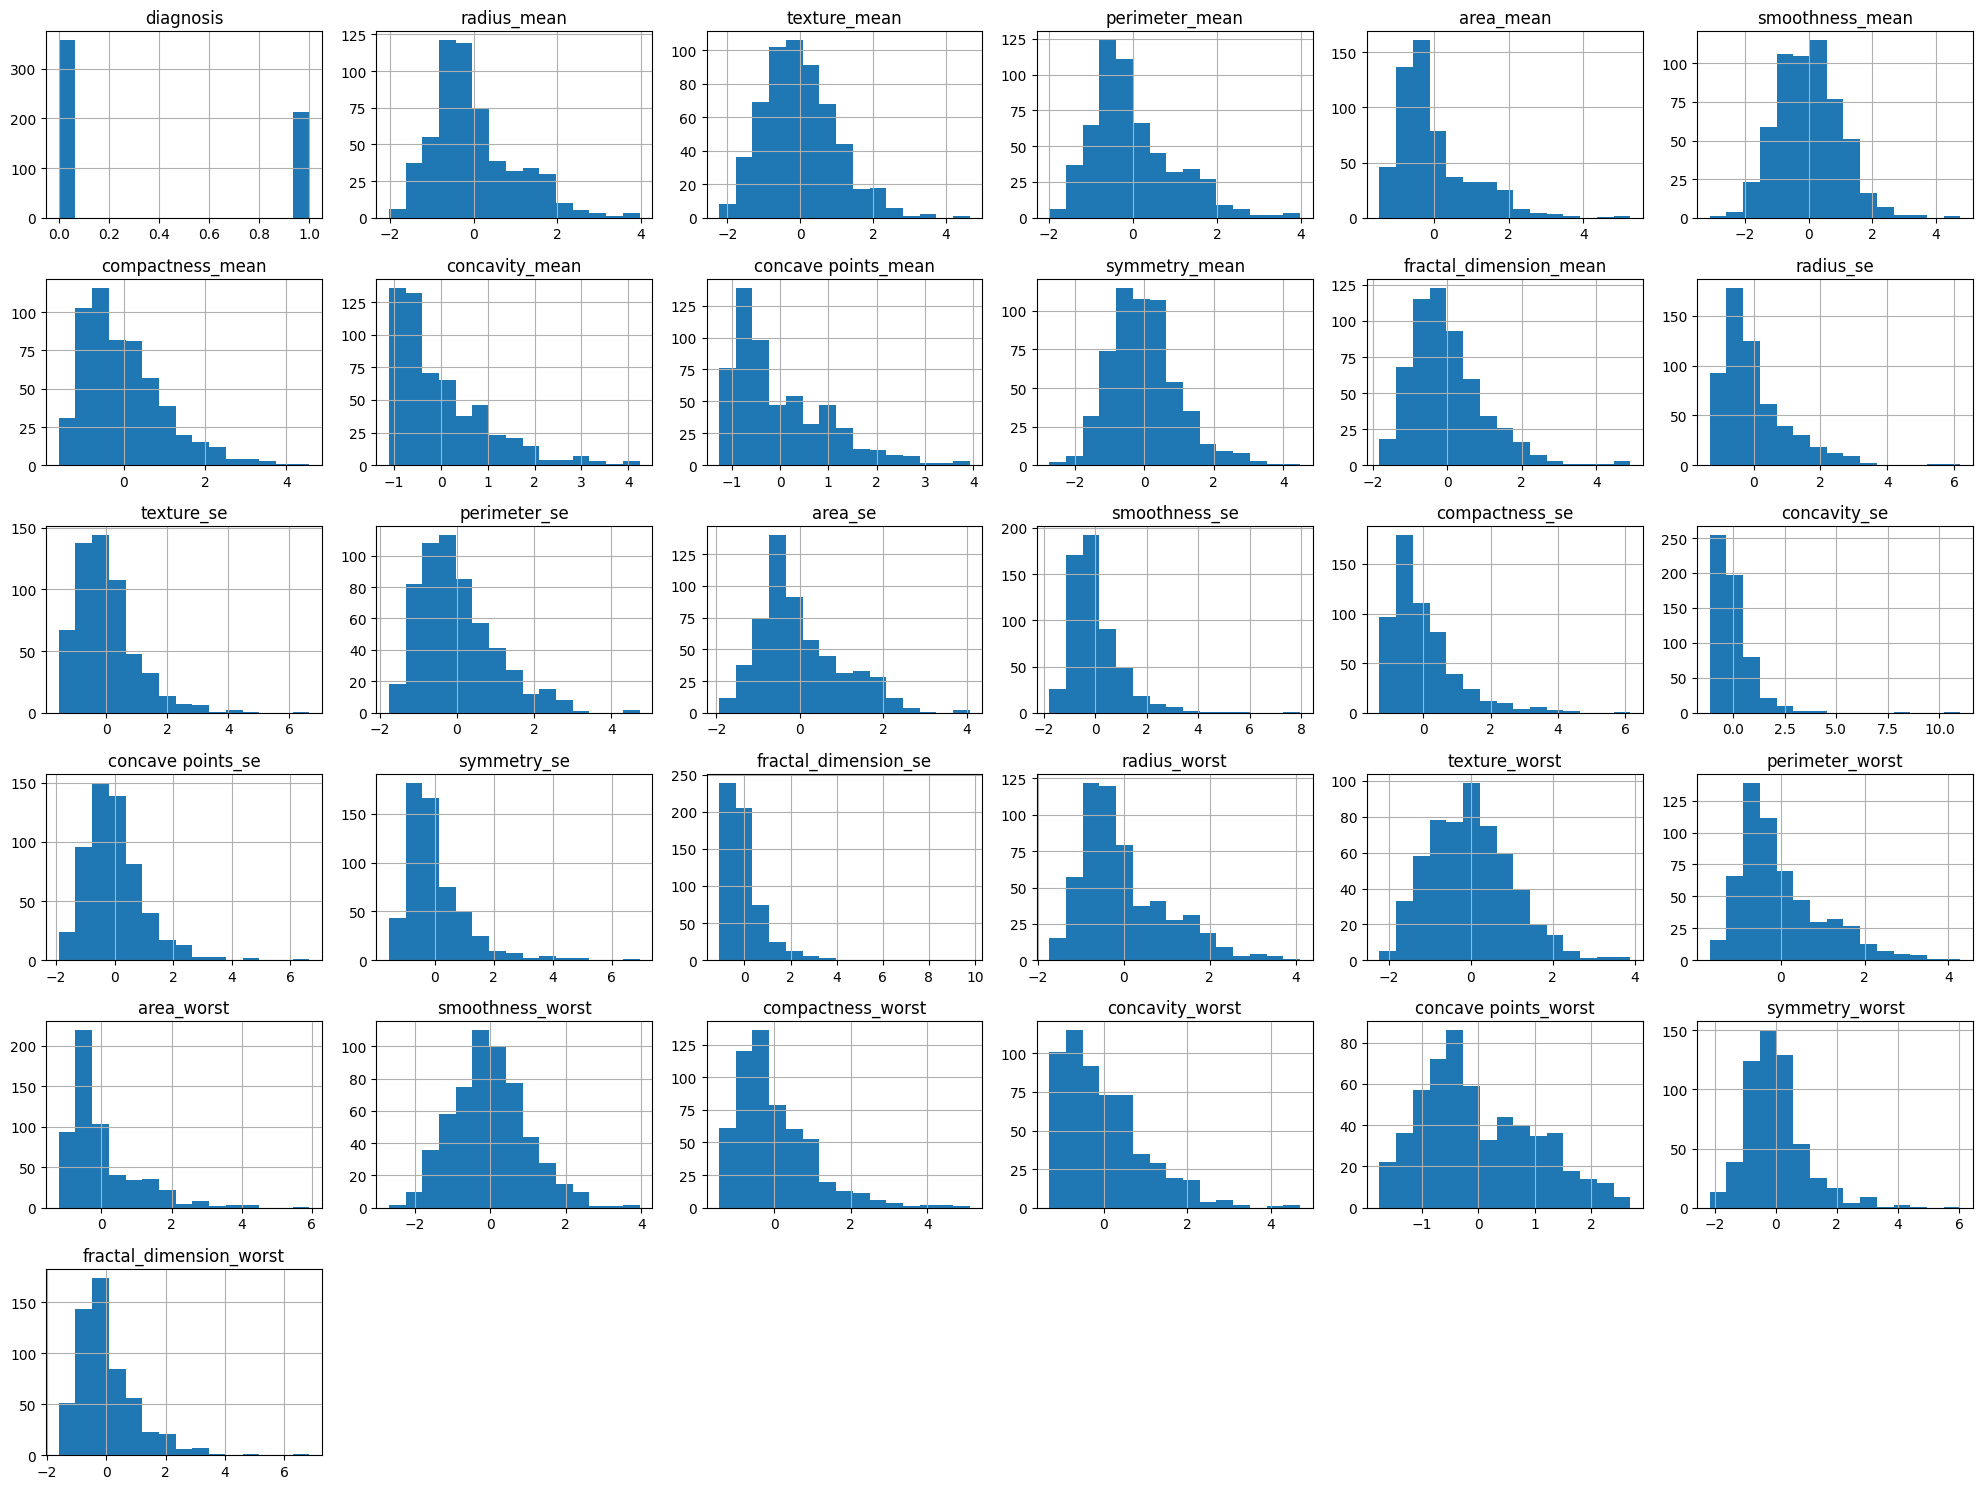

In [418]:
df.hist(bins=15, figsize=(20, 15), layout=(6, 6))
plt.tight_layout()
plt.show()

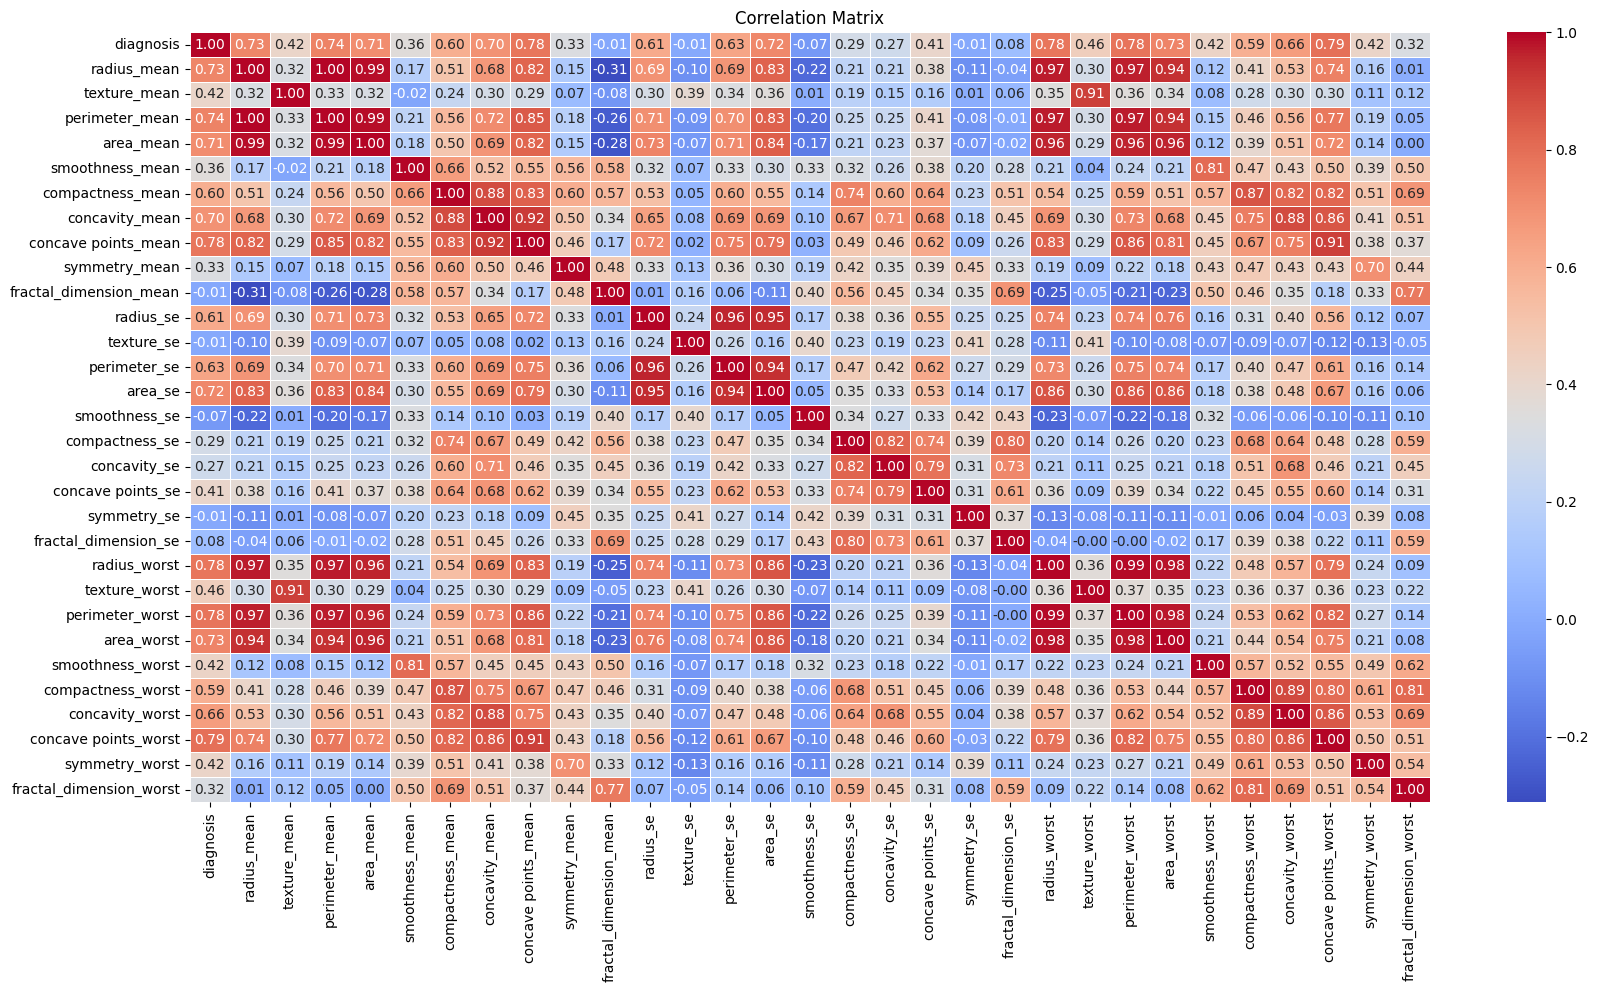

In [419]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5).figure.set_size_inches(20, 10)
plt.title('Correlation Matrix')
plt.show()

<div class="alert alert-info">
    The eventual diagnosis correlates well with the "size" (perimeter, radius, area) and concavity of the nucleus.
    Generally, the dataset seems to be highly correlated, altough there are several irrelevant correlations between features that measure roughly the same thing (mean, worst, se for every feature).
</div>

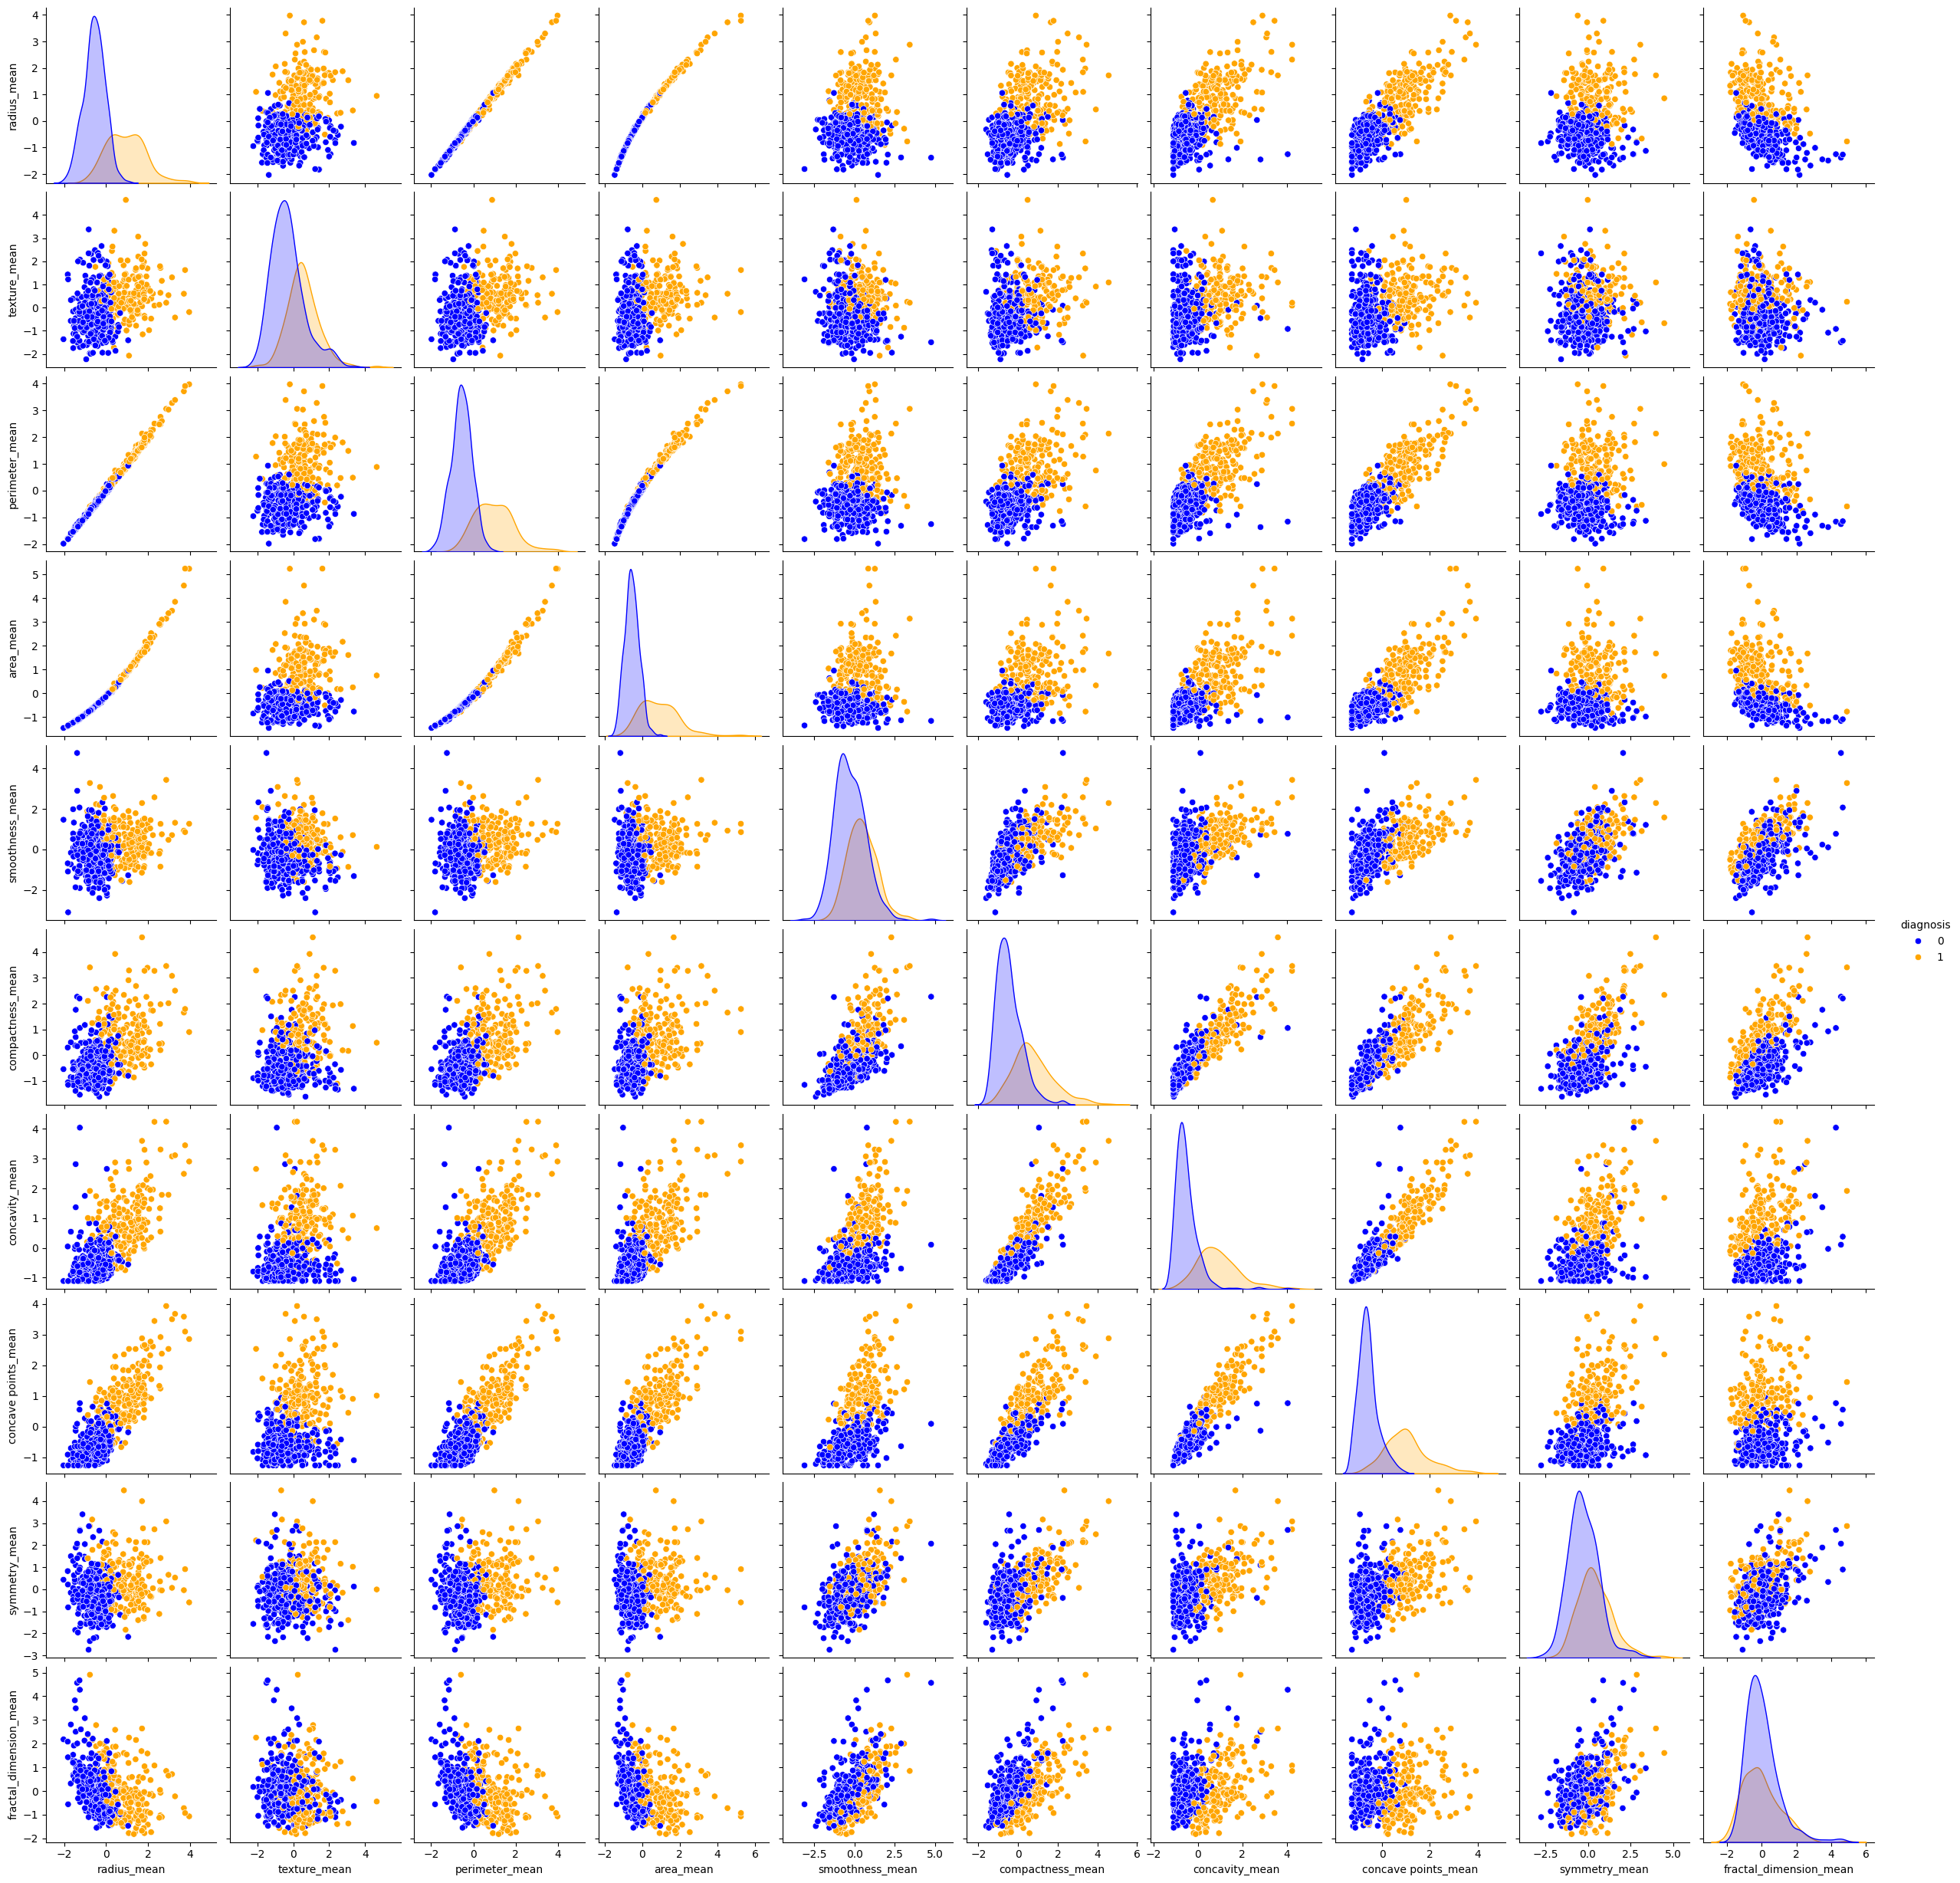

In [420]:
# Plot pairplot for a subset of features
sns.pairplot(
    df[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
        "fractal_dimension_mean" ]],
    hue = "diagnosis",
    palette={1: 'orange', 0: 'blue'}
)
plt.show()

<div class="alert alert-info">
    Overall, the data is well separated. The only features that are not well-separated are <b>fractal_dimension</b>, <b>symmetry</b>, <b>smoothness</b> and <b>texture</b>.<br>
    We can also observe that <b>the larger the nucleus is (measured by the radius, perimeter and area) there is a higher probability of having malignant breast cancer.</b><br>
    <b>Concavity</b> shows similar properties but there are a few outliers.
</div>

<br>
<br>

# Training <a class="anchor" id="training"></a>

<div class="alert alert-info">
    In general, we will use cross-validation and a Grid/Random search for hyperparameter optimalization.
</div>

## Neural Network <a class="anchor" id="nn"></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(random_state=1, max_iter=10000)

param_grid = {
    'hidden_layer_sizes': [(8,), (16,), (32,), (16, 16)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],
}

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=stratified_kf,
    scoring='f1',
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Best cross-validation accuracy: 0.9802197802197803
Test set accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Logistic Regression <a class="anchor" id="logres"></a>

In [422]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)
logreg.coef_


array([[ 0.42170575,  0.4597363 ,  0.38992846,  0.45428822,  0.07404599,
        -0.52730425,  0.83194298,  1.11157693, -0.24781408, -0.06299014,
         1.17960835, -0.19665484,  0.16687914,  1.06692987,  0.29099273,
        -0.68468889, -0.17897315,  0.37137957, -0.65938838, -0.63642068,
         0.74226631,  1.32019565,  0.49342255,  0.71976254,  0.51230787,
         0.03009625,  0.98072941,  0.70117948,  1.26855711,  0.19026785]])

## Random Forest <a class="anchor" id="rf"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=stratified_kf,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[0.03658499 0.01535778 0.07861072 0.05576783 0.00749777 0.01056016
 0.0475179  0.13704242 0.00328249 0.00471393 0.01772259 0.00400882
 0.01013932 0.02410327 0.00408039 0.00476759 0.00949563 0.00546071
 0.00647319 0.00637039 0.09208782 0.0238107  0.05637164 0.10625511
 0.00887198 0.01870324 0.03586021 0.14978029 0.01230755 0.00639357]


<br>
<br>

# Further Questions <a class="anchor" id="questions"></a>

<div class="alert alert-info">
    Now, we look at a few further questions worth investigating.
</div>


## Which features are the most important? <a class="anchor" id="important"></a>

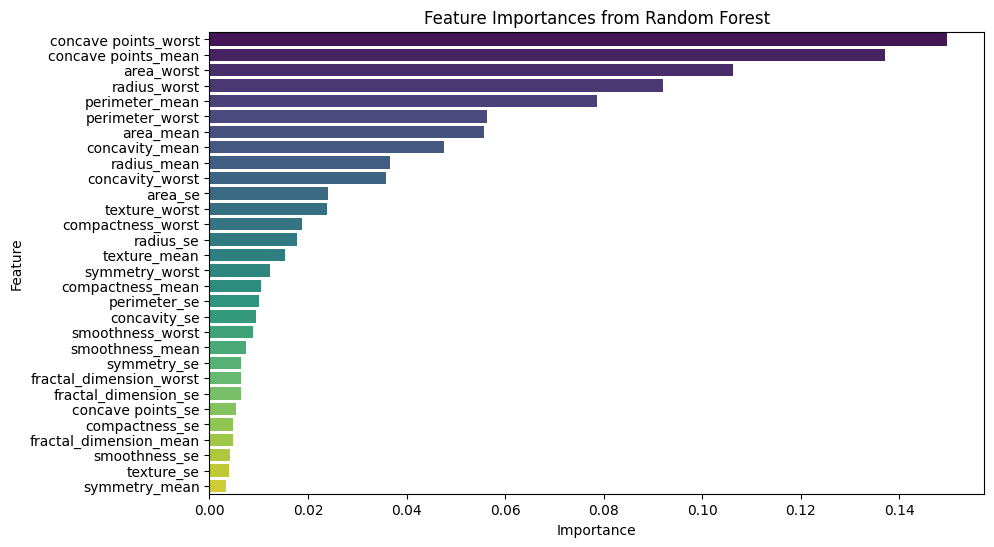

In [439]:
cols = list(df.columns)
cols.remove('diagnosis')
for pair in sorted(zip(cols, best_model.feature_importances_), key=lambda x: x[1], reverse=True):
    # print(f"{pair[0]}: {round(pair[1], 3)}")
    pass

feature_importances = best_model.feature_importances_
feature_df = pd.DataFrame({
    'Feature': cols,
    'Importance': feature_importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<div class="alert alert-info">
    We can use the Random Forest model's <b>.feature_importances_</b> property to see which features correlate the most with having malignant breast cancer.<br>
    The top features are <b>concavity</b>, <b>area</b>, <b>radius</b> and <b>perimeter</b> and this aligns well with the biological interpretation since <b>large radius and irregular texture often indicate malignancy because malignant tumors tend to grow and invade surrounding tissue</b>.
</div>